In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

### EDA (Exploratory Data Analisys)

In [3]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
# Percentage of women who survived VS Percentage of men who survived
women = train_data.loc[train_data.Sex=='female']
men = train_data.loc[train_data.Sex=='male']

survivor_women = women.loc[women.Survived == 1]
survivor_men = men.loc[men.Survived == 1]

In [22]:
print(f'{round(len(survivor_men)/len(men)*100,2)}% of men survived in Titanic')
print(f'{round(len(survivor_women)/len(women)*100,2)}% of women survived in Titanic')

18.89% of men survived in Titanic
74.2% of women survived in Titanic


In [30]:
children = train_data.loc[train_data.Age < 10]

In [31]:
survivor_children = children.loc[children.Survived==1]

In [32]:
print(f'{round(len(survivor_children)/len(children)*100,2)}% of children survived in Titanic')

61.29% of children survived in Titanic


In [131]:
# Analisys of the Class Ticket
class1 = train_data.loc[train_data.Pclass==1]
class2 = train_data.loc[train_data.Pclass==2]
class3 = train_data.loc[train_data.Pclass==3]

survivor_class1 = class1.loc[class1.Survived == 1]
survivor_class2 = class2.loc[class2.Survived == 1]
survivor_class3 = class3.loc[class3.Survived == 1]

In [135]:
len(survivor_class2)

87

In [132]:
print(f'{round(len(survivor_class1)/len(class1)*100,2)}% of Class 1 survived in Titanic')
print(f'{round(len(survivor_class2)/len(class2)*100,2)}% of Class 2 survived in Titanic')
print(f'{round(len(survivor_class3)/len(class2)*100,2)}% of Class 3 survived in Titanic')

62.96% of Class 1 survived in Titanic
47.28% of Class 2 survived in Titanic
64.67% of Class 3 survived in Titanic


### Correlation Matrix

In [115]:
def split_gender(age, gender):
    if age < 10: return 0
    if gender == 'male': return 1
    if gender == 'female': return 2
    else: return np.NaN

def new_embarked(embarked):
    if embarked == 'S': return 0
    if embarked == 'C': return 1
    if embarked == 'Q': return 2
    else: return np.NaN
    
def get_children(age):
    if age < 10: return 1
    if age >= 10: return 0
    else: return np.NaN

In [122]:
df_train = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
      
        
#df_train['Sex'] = df_train.apply(lambda row: split_gender(row['Age'], row['Sex']), axis=1)
#df_train['Embarked'] = df_train['Embarked'].apply(new_embarked)
df_train['IsChildren'] = df_train['Age'].apply(get_children)

#df_test['Sex'] = df_test.apply(lambda row: split_gender(row['Age'], row['Sex']), axis=1)
#df_test['Embarked'] = df_test['Embarked'].apply(new_embarked)
df_test['IsChildren'] = df_test['Age'].apply(get_children)

In [117]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsChildren
0,1,0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,0.0
2,3,1,3,female,26.0,0,0,7.9250,S,0.0
3,4,1,1,female,35.0,1,0,53.1000,S,0.0
4,5,0,3,male,35.0,0,0,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0.0
887,888,1,1,female,19.0,0,0,30.0000,S,0.0
888,889,0,3,female,NaN,1,2,23.4500,S,NaN
889,890,1,1,male,26.0,0,0,30.0000,C,0.0


In [ ]:
df_train.corr()

<Axes: >

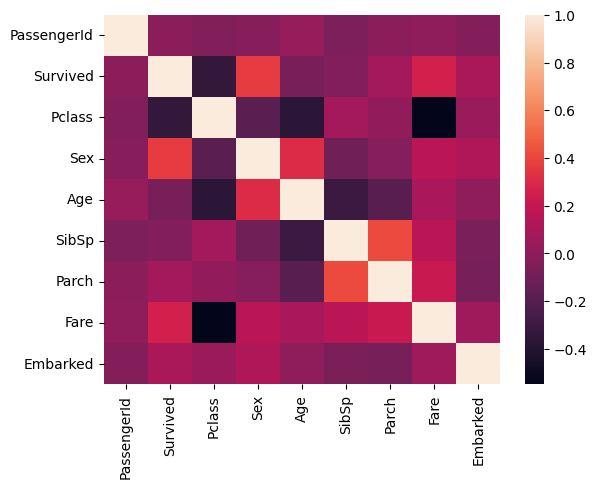

In [94]:
from seaborn import heatmap

sns.heatmap(df_train.corr())

## Lets make some predictions

In [95]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [123]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsChildren
0,892,3,male,34.5,0,0,7.8292,Q,0.0
1,893,3,female,47.0,1,0,7.0000,S,0.0
2,894,2,male,62.0,0,0,9.6875,Q,0.0
3,895,3,male,27.0,0,0,8.6625,S,0.0
4,896,3,female,22.0,1,1,12.2875,S,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,NaN
414,1306,1,female,39.0,0,0,108.9000,C,0.0
415,1307,3,male,38.5,0,0,7.2500,S,0.0
416,1308,3,male,NaN,0,0,8.0500,S,NaN


In [126]:
from sklearn.ensemble import RandomForestClassifier

# Target
y = train_data["Survived"]

# Features
features = ["Pclass", "Sex", "Fare", "IsChildren"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

In [127]:
X_test

,Pclass,Fare,Sex_female,Sex_male
0,3,7.8292,False,True
1,3,7.0000,True,False
2,2,9.6875,False,True
3,3,8.6625,False,True
4,3,12.2875,True,False
...,...,...,...,...
413,3,8.0500,False,True
414,1,108.9000,True,False
415,3,7.2500,False,True
416,3,8.0500,False,True


In [128]:
model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [129]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_9.csv', index=False)